In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [92]:
data = pd.read_csv("motocykles\motocykles_otomoto_cleaned.csv",engine='python')


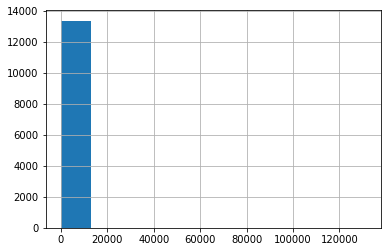

In [3]:
data.pojemnosc.hist()

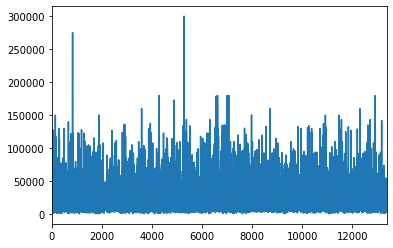

In [4]:
data.price.plot()

(0, 2020)

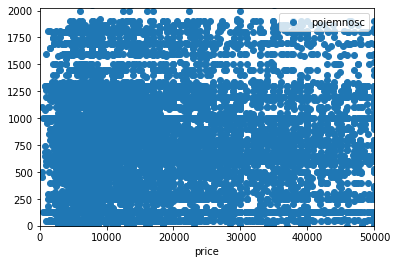

In [5]:
data.plot(x='price',y='pojemnosc', style='o')
plt.xlim(0,50000)
plt.ylim(0,2020)

In [6]:
data.describe()

,Unnamed: 0,price,pojemnosc,przebieg,year
count,13369.000000,13369.000000,13369.000000,13369.000000,13369.000000
mean,7292.302491,25693.650984,746.743137,19602.542374,2001.952951
std,4237.927851,24156.558828,1542.398283,31039.100719,136.959624
min,0.000000,370.000000,1.000000,0.000000,0.000000
25%,3600.000000,8900.000000,250.000000,1.000000,2006.000000
50%,7300.000000,17500.000000,660.000000,8750.000000,2014.000000
75%,10957.000000,34900.000000,1000.000000,32000.000000,2019.000000
max,14660.000000,300000.000000,131200.000000,999999.000000,2020.000000


In [7]:
data.describe()

,Unnamed: 0,price,pojemnosc,przebieg,year
count,13369.000000,13369.000000,13369.000000,13369.000000,13369.000000
mean,7292.302491,25693.650984,746.743137,19602.542374,2001.952951
std,4237.927851,24156.558828,1542.398283,31039.100719,136.959624
min,0.000000,370.000000,1.000000,0.000000,0.000000
25%,3600.000000,8900.000000,250.000000,1.000000,2006.000000
50%,7300.000000,17500.000000,660.000000,8750.000000,2014.000000
75%,10957.000000,34900.000000,1000.000000,32000.000000,2019.000000
max,14660.000000,300000.000000,131200.000000,999999.000000,2020.000000


In [95]:
feats = ['pojemnosc','przebieg','year','marka','model']
X = data[ feats ].values
Y = data['price']

enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_transform,Y, test_size = 0.3)


model = LinearRegression()
model.fit(X_train, Y_train)

ypred = model.predict(X_test)
model.score(X_train,Y_train)


0.7333456803620271

In [94]:
data.describe()

,Unnamed: 0,price,pojemnosc,przebieg,year
count,13160.000000,13160.000000,13160.000000,13160.000000,13160.000000
mean,7299.224240,25664.225532,721.552356,19257.244529,2011.547796
std,4240.469824,24088.217383,486.267472,24816.448467,8.191891
min,0.000000,370.000000,49.000000,0.000000,1971.000000
25%,3602.750000,8990.000000,250.000000,1.000000,2006.000000
50%,7302.500000,17500.000000,660.000000,8933.500000,2014.000000
75%,10976.250000,34900.000000,1000.000000,32000.000000,2019.000000
max,14660.000000,300000.000000,2400.000000,221730.000000,2020.000000


In [86]:
data.corr()

,Unnamed: 0,price,pojemnosc,przebieg,year
Unnamed: 0,1.000000,-0.005780,0.053481,0.049784,-0.048617
price,-0.005780,1.000000,0.036303,-0.047751,0.057859
pojemnosc,0.053481,0.036303,1.000000,0.041475,-0.035360
przebieg,0.049784,-0.047751,0.041475,1.000000,-0.466803
year,-0.048617,0.057859,-0.035360,-0.466803,1.000000


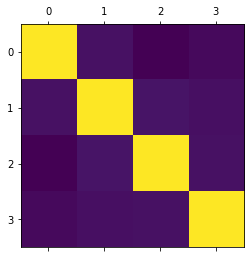

In [21]:
plt.matshow(data.corr())

In [77]:
data

,Unnamed: 0,price,marka,model,pojemnosc,przebieg,year
0,0,12999,Yamaha,YFZ,480,9999,2006
1,1,6900,Suzuki,LT,49,9999,2000
2,2,89900,Can-Am,Spyder,1330,3900,2016
3,3,25000,Husqvarna,FE,250,3600,2018
4,4,39950,BMW,GS,1170,74850,2012
5,5,8199,Husqvarna,TE,250,6000,2005
6,6,46900,BMW,F,853,5946,2019
7,8,8990,Kymco,Like,50,1,2018
8,9,7700,Kymco,Agility,50,1,2018
9,10,21000,Honda,VT,600,1000,1998


In [93]:
data = data[data.przebieg < 250000 ]
data = data[data.pojemnosc < 2500]
data = data[data.year > 1970 ]
data = data[data.pojemnosc > 48]


In [97]:
data.to_csv('motocykle_cleanV4.csv')